## Google Search daily data comparison

### Comparison based on URLs - 2 days

In [ ]:
from urllib.parse import urlparse, urlunparse

def normalize_url(url):
    try:
        parsed = urlparse(url)
        clean_url = urlunparse((parsed.scheme, parsed.netloc, parsed.path.rstrip("/"), '', '', ''))
        return clean_url.lower()
    except:
        return str(url).lower().strip()

def compare_2_urls_by_category(file1, file2, plot=False):
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    # Add a new column "Normalized URL" by applying the normalize_url function on "Source Link"
    df1["Normalized URL"] = df1["Source Link"].apply(normalize_url)
    df2["Normalized URL"] = df2["Source Link"].apply(normalize_url)

    all_categories = sorted(set(df1["Category"].unique()) | set(df2["Category"].unique()))
    summary = []

    for category in all_categories:
        # Filter rows by category.
        urls1 = df1[df1["Category"] == category]
        urls2 = df2[df2["Category"] == category]

        # Compute sets of normalized URLs.
        urls1_set = set(urls1["Normalized URL"].dropna().unique())
        urls2_set = set(urls2["Normalized URL"].dropna().unique())

        common = urls1_set & urls2_set
        only_in_1 = urls1_set - urls2_set
        only_in_2 = urls2_set - urls1_set

        total_unique = len(urls1_set | urls2_set)
        overlap_rate = len(common) / total_unique if total_unique > 0 else 0

        summary.append({
            "Category": category,
            "URLs in Day1": len(urls1_set),
            "URLs in Day2": len(urls2_set),
            "Common URLs": len(common),
            "Overlap Rate": round(overlap_rate, 2)
        })

        print(f"\n📦 Category: {category}")
        print(f"✅ Common URLs: {len(common)}")

        print(f"\n🔴 Only in {file1} ({len(only_in_1)}):")
        print(
            urls1[urls1["Normalized URL"].isin(only_in_1)]
            [["Source Link", "Source Rank"]]
            .drop_duplicates(subset="Source Link")
            .sort_values("Source Rank")
        )

        print(f"\n🔵 Only in {file2} ({len(only_in_2)}):")
        print(
            urls2[urls2["Normalized URL"].isin(only_in_2)]
            [["Source Link", "Source Rank"]]
            .drop_duplicates(subset="Source Link")
            .sort_values("Source Rank")
        )

        if plot:
            venn2([urls1_set, urls2_set], set_labels=("Day 1", "Day 2"))
            plt.title(f"URL Overlap for {category}")
            plt.show()

    result_df = pd.DataFrame(summary)
    return result_df

In [ ]:
googlesearch_3_31 = pd.read_csv("GoogleSearch_Data_3_31.csv")
googlesearch_4_1 = pd.read_csv("GoogleSearch_Data_4_1.csv")
googlesearch_4_2 = pd.read_csv("GoogleSearch_Data_4_2.csv")

In [ ]:
result = compare_2_urls_by_category(
    "googlesearch_brand_3_31.csv",
    "googlesearch_brand_4_1.csv",
    plot=True
)

result.sort_values(by="Overlap Rate", ascending=False)

### Comparison based on URLs - 3 days


📦 Category: baking ingredients
✅ Common URLs (all three): 8

🔴 Only in GoogleSearch_Data_3_31.csv (1):
                            Source Link  Source Rank
223  https://sallysbakingaddiction.com/           11

🔵 Only in GoogleSearch_Data_4_1.csv (0):
Empty DataFrame
Columns: [Source Link, Source Rank]
Index: []

🟢 Only in GoogleSearch_Data_4_2.csv (1):
                                           Source Link  Source Rank
118  https://www.williams-sonoma.com/shop/food/food...           10


/usr/local/lib/python3.11/dist-packages/matplotlib_venn/layout/venn3/pairwise.py:169: UserWarning: Bad circle positioning.
  warnings.warn("Bad circle positioning.")


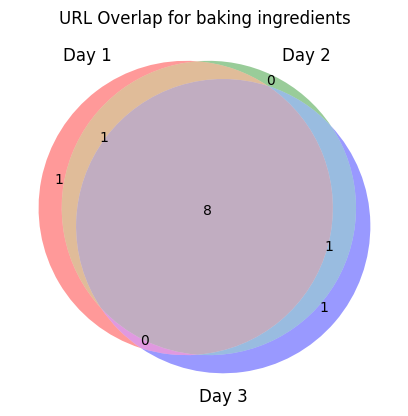


📦 Category: cat food
✅ Common URLs (all three): 8

🔴 Only in GoogleSearch_Data_3_31.csv (1):
                                           Source Link  Source Rank
119  https://www.walmart.com/c/lists/top-rated-cat-...           12

🔵 Only in GoogleSearch_Data_4_1.csv (0):
Empty DataFrame
Columns: [Source Link, Source Rank]
Index: []

🟢 Only in GoogleSearch_Data_4_2.csv (1):
                                           Source Link  Source Rank
395  https://www.smalls.com/?srsltid=AfmBOoqb8qwlr0...           10


/usr/local/lib/python3.11/dist-packages/matplotlib_venn/layout/venn3/pairwise.py:169: UserWarning: Bad circle positioning.
  warnings.warn("Bad circle positioning.")


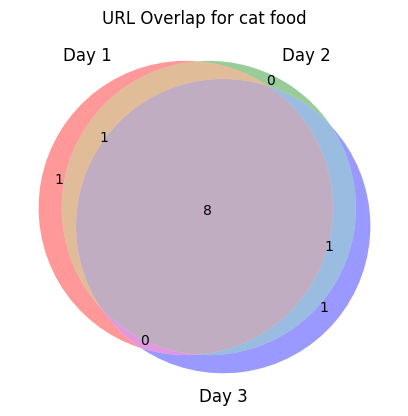


📦 Category: cat litter
✅ Common URLs (all three): 8

🔴 Only in GoogleSearch_Data_3_31.csv (0):
Empty DataFrame
Columns: [Source Link, Source Rank]
Index: []

🔵 Only in GoogleSearch_Data_4_1.csv (0):
Empty DataFrame
Columns: [Source Link, Source Rank]
Index: []

🟢 Only in GoogleSearch_Data_4_2.csv (0):
Empty DataFrame
Columns: [Source Link, Source Rank]
Index: []


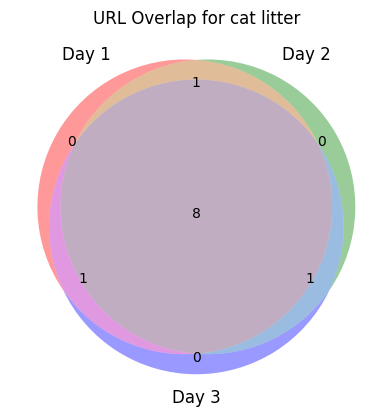


📦 Category: dog food
✅ Common URLs (all three): 4

🔴 Only in GoogleSearch_Data_3_31.csv (3):
                                           Source Link  Source Rank
351         https://www.petsmart.com/dog/food/dry-food           11
364       https://openfarmpet.com/collections/dog-food           12
409  https://www.target.com/c/dog-food-supplies-pet...           13

🔵 Only in GoogleSearch_Data_4_1.csv (3):
                                           Source Link  Source Rank
393  https://www.reddit.com/r/dogs/comments/1hxb7fu...            8
372   https://openfarmpet.com/collections/dry-dog-food           12
401  https://www.petsmart.com/dog/food/dry-food/pur...           15

🟢 Only in GoogleSearch_Data_4_2.csv (4):
                                           Source Link  Source Rank
279                           https://www.myollie.com/            9
299  https://www.petmd.com/dog/nutrition/how-to-cho...           13
314  https://www.nbcchicago.com/consumer/whats-in-d...           15
269  h

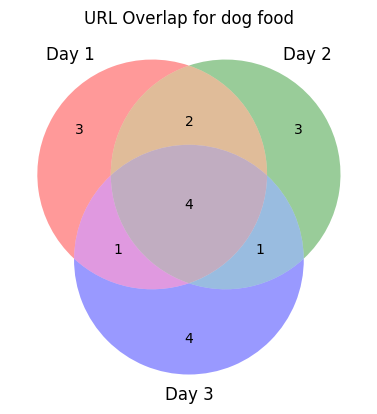


📦 Category: instant coffee
✅ Common URLs (all three): 6

🔴 Only in GoogleSearch_Data_3_31.csv (1):
                                           Source Link  Source Rank
282  https://www.allrecipes.com/longform/best-insta...            8

🔵 Only in GoogleSearch_Data_4_1.csv (2):
                                          Source Link  Source Rank
30  https://www.goodhousekeeping.com/uk/wine/g4636...            8
55   https://sporked.com/article/best-instant-coffee/            9

🟢 Only in GoogleSearch_Data_4_2.csv (1):
                                          Source Link  Source Rank
62  https://www.simplyrecipes.com/best-instant-cof...           10


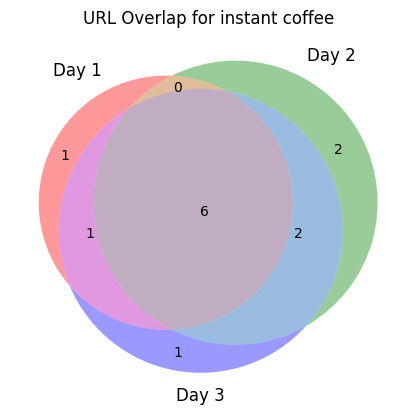

             Category  URLs in Day1  URLs in Day2  URLs in Day3  Common URLs  \
0  baking ingredients            10            10            10            8   
1            cat food            10            10            10            8   
2          cat litter            10            10            10            8   
3            dog food            10            10            10            4   
4      instant coffee             8            10            10            6   

   Overlap Rate  
0          0.67  
1          0.67  
2          0.73  
3          0.22  
4          0.46  


In [ ]:
def compare_google_urls_by_category_3(file1, file2, file3, plot=False):
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    df3 = pd.read_csv(file3)

    # Add a new column "Normalized URL" by applying normalize_url to "Source Link"
    df1["Normalized URL"] = df1["Source Link"].apply(normalize_url)
    df2["Normalized URL"] = df2["Source Link"].apply(normalize_url)
    df3["Normalized URL"] = df3["Source Link"].apply(normalize_url)

    # Get the union of all categories across the three files.
    all_categories = sorted(set(df1["Category"].unique()) | set(df2["Category"].unique()) | set(df3["Category"].unique()))
    summary = []

    for category in all_categories:
        # Filter rows by category.
        urls1 = df1[df1["Category"] == category]
        urls2 = df2[df2["Category"] == category]
        urls3 = df3[df3["Category"] == category]

        # Compute sets of normalized URLs.
        urls1_set = set(urls1["Normalized URL"].dropna().unique())
        urls2_set = set(urls2["Normalized URL"].dropna().unique())
        urls3_set = set(urls3["Normalized URL"].dropna().unique())

        # Compute common URLs among all three days.
        common_all = urls1_set & urls2_set & urls3_set

        # Compute URLs unique to each day.
        only_in_1 = urls1_set - (urls2_set | urls3_set)
        only_in_2 = urls2_set - (urls1_set | urls3_set)
        only_in_3 = urls3_set - (urls1_set | urls2_set)

        total_unique = len(urls1_set | urls2_set | urls3_set)
        overlap_rate = len(common_all) / total_unique if total_unique > 0 else 0

        summary.append({
            "Category": category,
            "URLs in Day1": len(urls1_set),
            "URLs in Day2": len(urls2_set),
            "URLs in Day3": len(urls3_set),
            "Common URLs": len(common_all),
            "Overlap Rate": round(overlap_rate, 2)
        })

        print(f"\n📦 Category: {category}")
        print(f"✅ Common URLs (all three): {len(common_all)}")

        print(f"\n🔴 Only in {file1} ({len(only_in_1)}):")
        print(urls1[urls1["Normalized URL"].isin(only_in_1)][["Source Link", "Source Rank"]]
              .drop_duplicates(subset="Source Link")
              .sort_values("Source Rank"))

        print(f"\n🔵 Only in {file2} ({len(only_in_2)}):")
        print(urls2[urls2["Normalized URL"].isin(only_in_2)][["Source Link", "Source Rank"]]
              .drop_duplicates(subset="Source Link")
              .sort_values("Source Rank"))

        print(f"\n🟢 Only in {file3} ({len(only_in_3)}):")
        print(urls3[urls3["Normalized URL"].isin(only_in_3)][["Source Link", "Source Rank"]]
              .drop_duplicates(subset="Source Link")
              .sort_values("Source Rank"))

        if plot:
            venn3([urls1_set, urls2_set, urls3_set],
                  set_labels=("Day 1", "Day 2", "Day 3"))
            plt.title(f"URL Overlap for {category}")
            plt.show()

    result_df = pd.DataFrame(summary)
    return result_df

result = compare_google_urls_by_category_3("GoogleSearch_Data_3_31.csv", "GoogleSearch_Data_4_1.csv", "GoogleSearch_Data_4_2.csv", plot=True)
print(result)